In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [101]:
pd.set_option('display.max_columns', None)
dataset = pd.read_excel("Superstore_USA.xlsx")

In [103]:
dataset.head(20)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.320000,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.560000,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.640000,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.510000,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,V70,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.202300,8,1446.67,88523
5,23597,Medium,0.09,55.48,14.30,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 194,0.37,West,Washington,Anacortes,98221,2011-11-09,2011-11-11,1388.052300,37,2011.67,88524
6,25549,Low,0.08,120.97,26.30,3,Bonnie Potter,Delivery Truck,Corporate,Technology,Office Machines,Jumbo Drum,Canon S750 Color Inkjet Printer,0.38,West,Washington,Anacortes,98221,2013-07-01,2013-07-08,1001.445300,12,1451.37,88526
7,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,Chairs & Chairmats,Jumbo Drum,Global Troy™ Executive Leather Low-Back Tilter,0.60,West,California,San Gabriel,91776,2010-12-13,2010-12-15,4390.366500,12,6362.85,90193
8,19483,Low,0.08,6.48,6.81,5,Ronnie Proctor,Regular Air,Home Office,Office Supplies,Paper,Small Box,Xerox 1930,0.36,West,California,San Gabriel,91776,2012-05-12,2012-05-21,-141.260000,18,113.25,90197
9,24782,High,0.01,90.24,0.99,6,Dwight Hwang,Regular Air,Home Office,Office Supplies,Appliances,Small Box,Kensington 6 Outlet MasterPiece® HOMEOFFICE Po...,0.56,West,California,San Jose,95123,2011-05-26,2011-05-26,1045.467300,16,1515.17,90194


In [60]:
dataset.shape

(9426, 24)

In [72]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [73]:
dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean(),inplace=True)

In [74]:
dataset.shape

(9426, 24)

# Order Priority

In [75]:
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [76]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [77]:
dataset['Order Priority'] = dataset['Order Priority'].replace("Critical ", "Critical")

In [78]:
dataset['Order Priority']

0       Not Specified
1                High
2       Not Specified
3       Not Specified
4       Not Specified
            ...      
9421         Critical
9422         Critical
9423    Not Specified
9424             High
9425    Not Specified
Name: Order Priority, Length: 9426, dtype: object

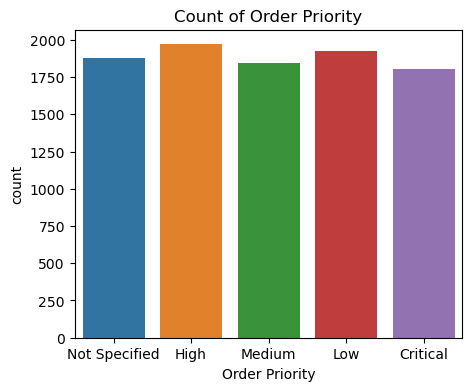

In [79]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority", data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()

# Ship Mode

In [80]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [81]:
x = dataset["Ship Mode"].value_counts().index
y = dataset["Ship Mode"].value_counts().values

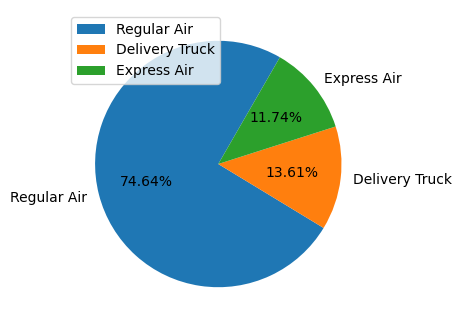

In [82]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x, startangle = 60, autopct="%0.2f%%")
#plt.legend(loc="lower right", bbox_to_anchor=(2,0))
plt.legend(loc=2)
plt.show()


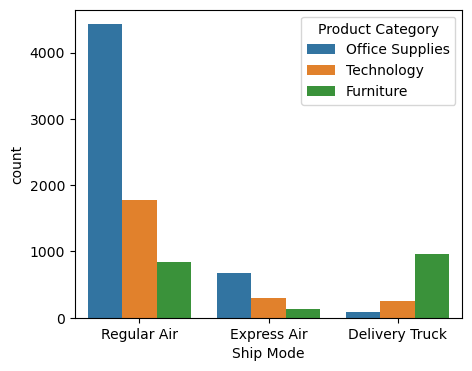

In [83]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# customer segment

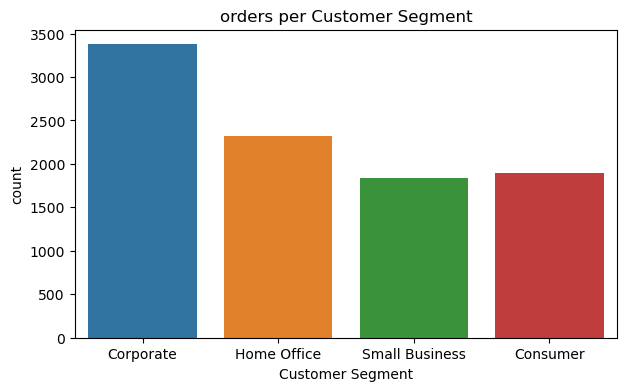

In [87]:
plt.figure(figsize=(7,4))
sns.countplot(x="Customer Segment", data=dataset)
plt.title("orders per Customer Segment")
plt.show()

# Product Category

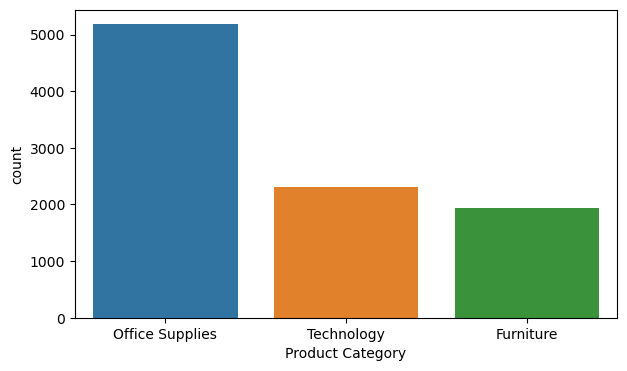

In [89]:
plt.figure(figsize=(7,4))
sns.countplot(x="Product Category", data=dataset)
plt.show()

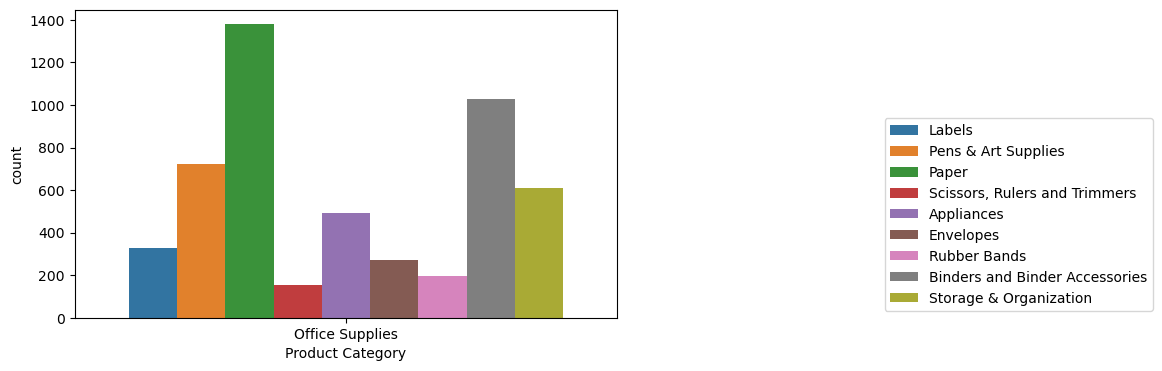

In [96]:
plt.figure(figsize=(7,4))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"] == "Office Supplies"],  hue="Product Sub-Category")
plt.legend(loc="lower right", bbox_to_anchor=(2,0))
plt.show()

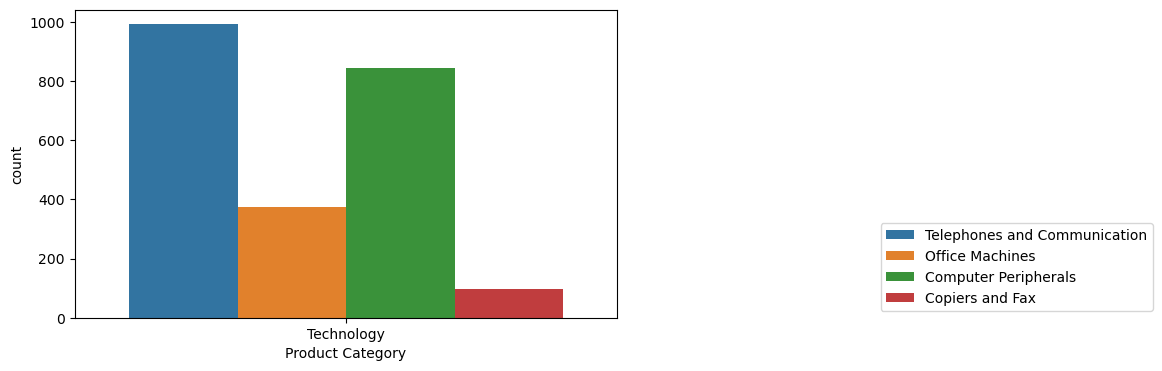

In [104]:
plt.figure(figsize=(7,4))
sns.countplot(x="Product Category", data=dataset[dataset["Product Category"] == "Technology"],  hue="Product Sub-Category")
plt.legend(loc="lower right", bbox_to_anchor=(2,0))
plt.show()

In [99]:
column_headers = list(dataset.columns.values)

In [110]:
column_headers

['Row ID',
 'Order Priority',
 'Discount',
 'Unit Price',
 'Shipping Cost',
 'Customer ID',
 'Customer Name',
 'Ship Mode',
 'Customer Segment',
 'Product Category',
 'Product Sub-Category',
 'Product Container',
 'Product Name',
 'Product Base Margin',
 'Region',
 'State or Province',
 'City',
 'Postal Code',
 'Order Date',
 'Ship Date',
 'Profit',
 'Quantity ordered new',
 'Sales',
 'Order ID']

In [111]:
dataset['Order Year'] = dataset['Order Date'].dt.year

In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [113]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

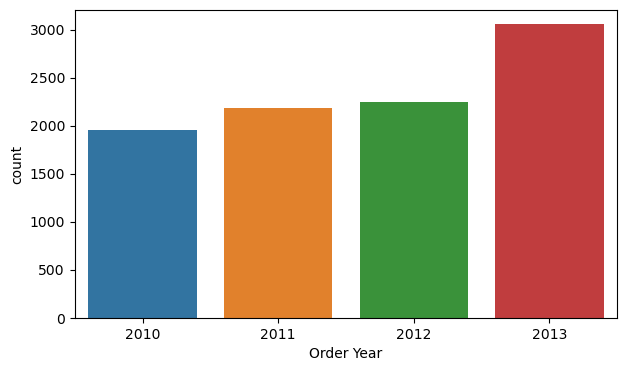

In [114]:
plt.figure(figsize=(7,4))
sns.countplot(x="Order Year", data=dataset)
plt.show()

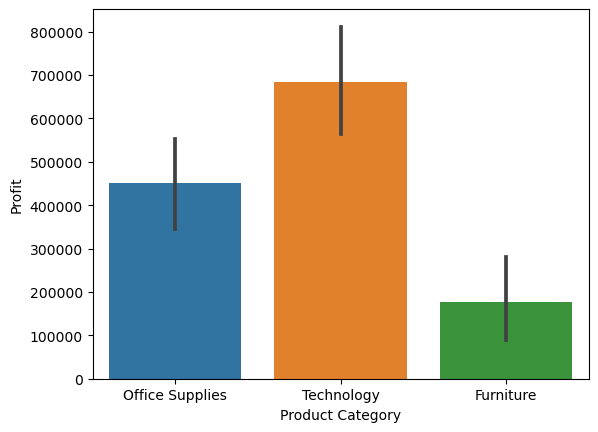

In [116]:
sns.barplot(x="Product Category", y="Profit", data=dataset, estimator='sum')
plt.show()

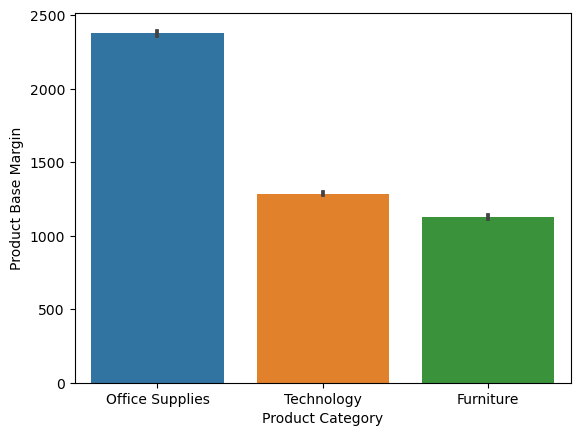

In [120]:
sns.barplot(x="Product Category", y="Product Base Margin", data=dataset, estimator='sum')
plt.show()

In [117]:
dataset['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [118]:
dataset['State or Province'].value_counts()[:5]
#to get top 5

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64